#Python Notebook 3
- Author - D.M.G. Pamodi Pansiluni
- UoW ID - w2053166
- IIT ID - 20230614
- Code Peer Reviewer - Misal Silva

#Classification Model

Reused from Code Reuse Session 2 Mortality Status Classification Modelling & Hyperparameters Tuning (Week 7). This block imports essential libraries for data manipulation, model training, and evaluation, including pandas, numpy, and matplotlib for data handling and visualization, and various sklearn modules for model creation and evaluation.

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score


In [2]:
#Loading prepared classification data
classification_data = pd.read_csv("/content/drive/MyDrive/Final_Datasets/classification_dataset.csv")

Reused from Code Reuse Session 2 Mortality Status Classification Modelling & Hyperparameters Tuning (Week 7). This block separates the feature set X from the target variable y by dropping the 'Mortality_Status' column from the dataset.

In [3]:
# Split features and target
X = classification_data.drop('Mortality_Status', axis=1)
y = classification_data['Mortality_Status']

Reused from Code Reuse Session 2 Mortality Status Classification Modelling & Hyperparameters Tuning (Week 7). This block splits the dataset into training and testing sets with an 80/20 ratio, ensuring stratification to maintain class balance in both sets.

In [4]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Reused from Code Reuse Session 1 Coursework Data Understanding and Preparation (Week 5). This block drops irrelevant columns, converts specific features to float, and applies one-hot encoding to categorical variables for model compatibility.

In [5]:
# Drop Patient_ID and index (if it's not set as index)
X_train = X_train.drop(columns=["Patient_ID", "index"], errors='ignore')

# Convert 'Grade' and 'Reginol_Node_Positive' to float (if they are strings)
X_train["Grade"] = X_train["Grade"].astype(float)
X_train["Reginol_Node_Positive"] = X_train["Reginol_Node_Positive"].astype(float)

# Apply one-hot encoding to categorical columns
# Include 'Sex' in the list of categorical columns
categorical_cols = ["T_Stage", "N_Stage", "6th_Stage", "Differentiated",
                    "A_Stage", "Estrogen_Status", "Progesterone_Status", "Sex"]
X_train = pd.get_dummies(X_train, columns=categorical_cols)

Reused from Code Reuse Session 1 Coursework Data Understanding and Preparation (Week 5). This block applies one-hot encoding to the test set and aligns the training and testing sets to ensure they have the same features, filling any missing columns with zeros.

In [6]:
# Apply one-hot encoding to X_test with the updated categorical_cols
X_test = pd.get_dummies(X_test, columns=categorical_cols)

# Align training and testing sets
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

Reused from Code Reuse Session 2 Mortality Status Classification Modelling & Hyperparameters Tuning (Week 7)
Fits a Logistic Regression model, evaluates it using confusion matrix, classification report, and ROC curve, and calculates the AUC score to assess performance.

Logistic Regression Confusion Matrix:
[[676   6]
 [111  12]]

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       682
           1       0.67      0.10      0.17       123

    accuracy                           0.85       805
   macro avg       0.76      0.54      0.55       805
weighted avg       0.83      0.85      0.81       805



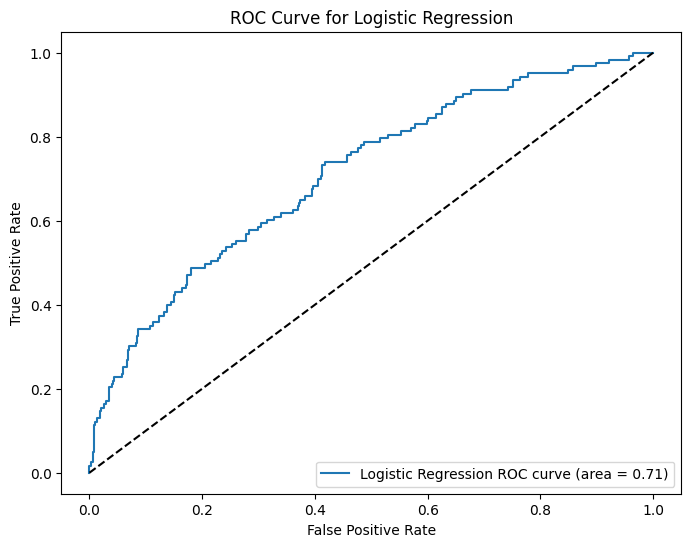

In [7]:
# Fit Logistic Regression
lr = LogisticRegression(C=0.1, penalty='l2', solver='saga', max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]

# Confusion Matrix
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

# Classification Report
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

# ROC Curve and AUC
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression ROC curve (area = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

Reused from Code Reuse Session 2 Mortality Status Classification Modelling & Hyperparameters Tuning (Week 7). This block trains a Naïve Bayes model, evaluates its performance using a confusion matrix, classification report, and ROC curve, and computes the AUC to assess model quality.

Naive Bayes Confusion Matrix:
[[579 103]
 [ 73  50]]

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       682
           1       0.33      0.41      0.36       123

    accuracy                           0.78       805
   macro avg       0.61      0.63      0.62       805
weighted avg       0.80      0.78      0.79       805



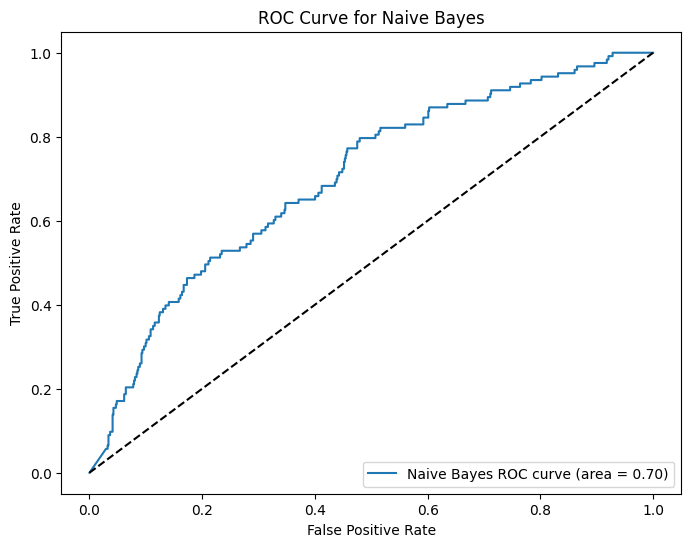

In [8]:
# Fit Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predictions
y_pred_nb = nb.predict(X_test)
y_prob_nb = nb.predict_proba(X_test)[:, 1]

# Confusion Matrix
print("Naive Bayes Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

# Classification Report
print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

# ROC Curve and AUC
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes ROC curve (area = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes')
plt.legend(loc='lower right')
plt.show()

Reused from Code Reuse Session 2 Mortality Status Classification Modelling & Hyperparameters  (Week 7). This block initializes the Logistic Regression and Naïve Bayes models with specified hyperparameters for model training and evaluation.

In [9]:
#Based on notebook01 result, using Logistic Regression and Naive bayes
lr = LogisticRegression(C=0.1, penalty='l2', solver='saga', max_iter=1000, random_state=42)
nb = GaussianNB()

Reused from Code Reuse Session 3 Building Regression DT and an Ensemble Learner (Week 11). This block creates an ensemble model using a VotingClassifier with logistic regression and Naïve Bayes as base models. It uses 'soft' voting, which combines the predicted probabilities of each model for the final prediction.

In [10]:
# Create the ensemble voting classifier based on the probability
ensemble = VotingClassifier(
    estimators=[('lr', lr), ('nb', nb)],
    voting='soft'  # 'soft' for probability based voting
)

# Fit the ensemble
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.1, max_iter=1000,
                                                 random_state=42,
                                                 solver='saga')),
                             ('nb', GaussianNB())],
                 voting='soft')

Reused from Code Reuse Session 3 Building Regression DT and an Ensemble Learner (Week 11). This block generates predictions and predicted probabilities for the test set using the ensemble model, which combines the outputs of the Logistic Regression and Naïve Bayes classifiers.

In [11]:
# Makeing predictions
y_pred = ensemble.predict(X_test)
y_prob = ensemble.predict_proba(X_test)[:, 1]

Reused from Code Reuse Session 3 Building Regression DT and an Ensemble Learner (Week 11). This block evaluates the performance of the ensemble classifier by generating and printing the confusion matrix and classification report to assess the model's accuracy, precision, recall, and F1-score.

In [12]:
# Evaluate ensemble performance
print("--- Ensemble Classifier Results ---")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

--- Ensemble Classifier Results ---

Confusion Matrix:
[[585  97]
 [ 73  50]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       682
           1       0.34      0.41      0.37       123

    accuracy                           0.79       805
   macro avg       0.61      0.63      0.62       805
weighted avg       0.81      0.79      0.80       805



Reused from Code Reuse Session 3 Building Regression DT and an Ensemble Learner (Week 11). This block plots the ROC curve for the ensemble classifier, displaying the trade-off between the false positive rate and the true positive rate, and calculates the AUC to evaluate model performance.

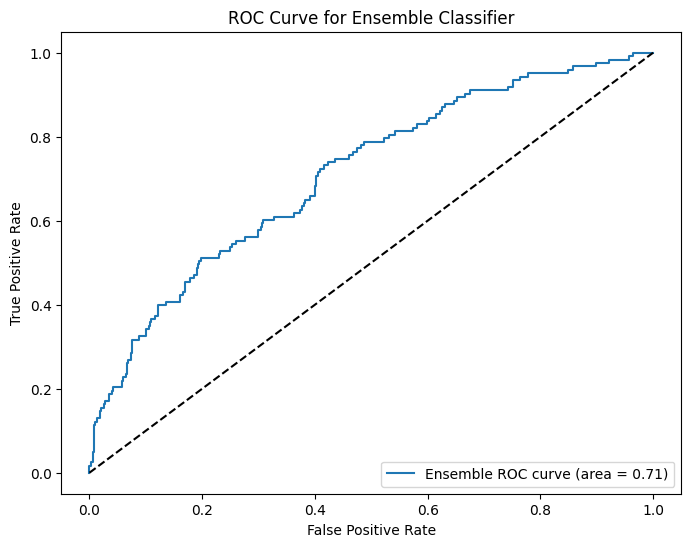

In [13]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Ensemble ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Ensemble Classifier')
plt.legend(loc='lower right')
plt.show()

Reused from Code Reuse Session 3 Building Regression DT and an Ensemble Learner (Week 11). This block makes predictions with the ensemble classifier, calculates the accuracy of the model by comparing the predicted class labels to the true labels, and prints the result.

In [14]:
# Makeing predictions
y_pred = ensemble.predict(X_test)  # Get predicted class labels (0 or 1)
y_prob = ensemble.predict_proba(X_test)[:, 1]  # Get probabilities for class 1

# Calculate accuracy using predicted class labels, not probabilities
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.79


#Regression Model

In [15]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [16]:
# Loading the prepared regression data
regression_data = pd.read_csv("/content/drive/MyDrive/Final_Datasets/regression_dataset.csv")

Reused from Code Reuse Session 3 Building Regression DT and an Ensemble Learner  (Week 11). This block creates new features by performing feature engineering, including interaction terms between Tumor_Size and Grade, Age and Tumor_Size, as well as a logarithmic transformation of the Tumor_Size feature.

In [17]:
regression_data['Tumor_Size_x_Grade'] = regression_data['Tumor_Size'] * regression_data['Grade']
regression_data['Age_x_Tumor_Size'] = regression_data['Age'] * regression_data['Tumor_Size']
regression_data['Tumor_Size_log'] = np.log(regression_data['Tumor_Size'] + 1)


Reused from Code Reuse Session 3 Building Regression DT and an Ensemble Learner (Week 11). This block separates the feature set X from the target variable y by dropping the 'Survival_Months' column from the dataset.

In [18]:
# Spliting features and target
X = regression_data.drop('Survival_Months', axis=1)
y = regression_data['Survival_Months']

Reused from Code Reuse Session 3 Building Regression DT and an Ensemble Learner (Week 11). This block splits the dataset into training and testing sets with an 80/20 ratio to prepare the data for model training and evaluation.

In [19]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Reused from Code Reuse Session 1 Coursework Data Understanding and Preparation (Week 5). This block prepares the training data by dropping unnecessary columns (Patient_ID, index), converting specific columns (Grade, Reginol_Node_Positive) to the appropriate data types, and identifying categorical variables for one-hot encoding.

In [20]:
# 1. Drop 'Patient_ID' and 'index'
X_train = X_train.drop(columns=["Patient_ID", "index"], errors='ignore')

# 2. Convert numeric-looking string columns to float
X_train["Grade"] = X_train["Grade"].astype(float)
X_train["Reginol_Node_Positive"] = X_train["Reginol_Node_Positive"].astype(float)

# 3. Define categorical columns to encode
categorical_cols = ["Sex", "T_Stage", "N_Stage", "6th_Stage",
                    "Differentiated", "A_Stage",
                    "Estrogen_Status", "Progesterone_Status"]


Reused from Code Reuse Session 1 Coursework Data Understanding and Preparation (Week 5). This block applies one-hot encoding to the categorical columns in both the training and testing sets and aligns the columns between the two sets, filling missing columns in the test set with zeros to ensure consistency.

In [21]:
# 4. One-hot encode those columns
X_train = pd.get_dummies(X_train, columns=categorical_cols)
X_test = pd.get_dummies(X_test, columns=categorical_cols)

# Align columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


Reused from Code Reuse Session 3 Building Regression DT and an Ensemble Learner (Week 11). This block creates and trains a fully grown Decision Tree regression model (DT-1) using the training data to predict survival months.

In [22]:
# Create a fully grown Decision Tree (DT-1)
dt_full = DecisionTreeRegressor(random_state=42)
dt_full.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

Reused from Code Reuse Session 3 Building Regression DT and an Ensemble Learner (Week 11). This block creates and trains a pruned Decision Tree regression model (DT-2), limiting the tree depth to 4 levels to prevent overfitting and improve generalization.

In [23]:
# Create a pruned Decision Tree (DT-2) - limit to 4 levels
dt_pruned = DecisionTreeRegressor(max_depth=4, random_state=42)
dt_pruned.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

Reused from Code Reuse Session 3 Building Regression DT and an Ensemble Learner (Week 11). This block defines a function to evaluate the performance of regression models by calculating the Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R²) metrics. It prints the results for each model and returns the calculated values.

In [24]:
# Evaluating both models
def evaluate_regression_model(model, X_train, X_test, y_train, y_test, model_name):
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrices
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"--- {model_name} Results ---")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"R-squared: {r2:.2f}")

    return mse, mae, r2

Reused from Code Reuse Session 3 Building Regression DT and an Ensemble Learner (Week 11). This block visualizes both the fully grown (DT-1) and pruned (DT-2) decision trees, showing their first few levels. The trees are plotted with feature names and color-coded nodes to provide a clear representation of the model structure.

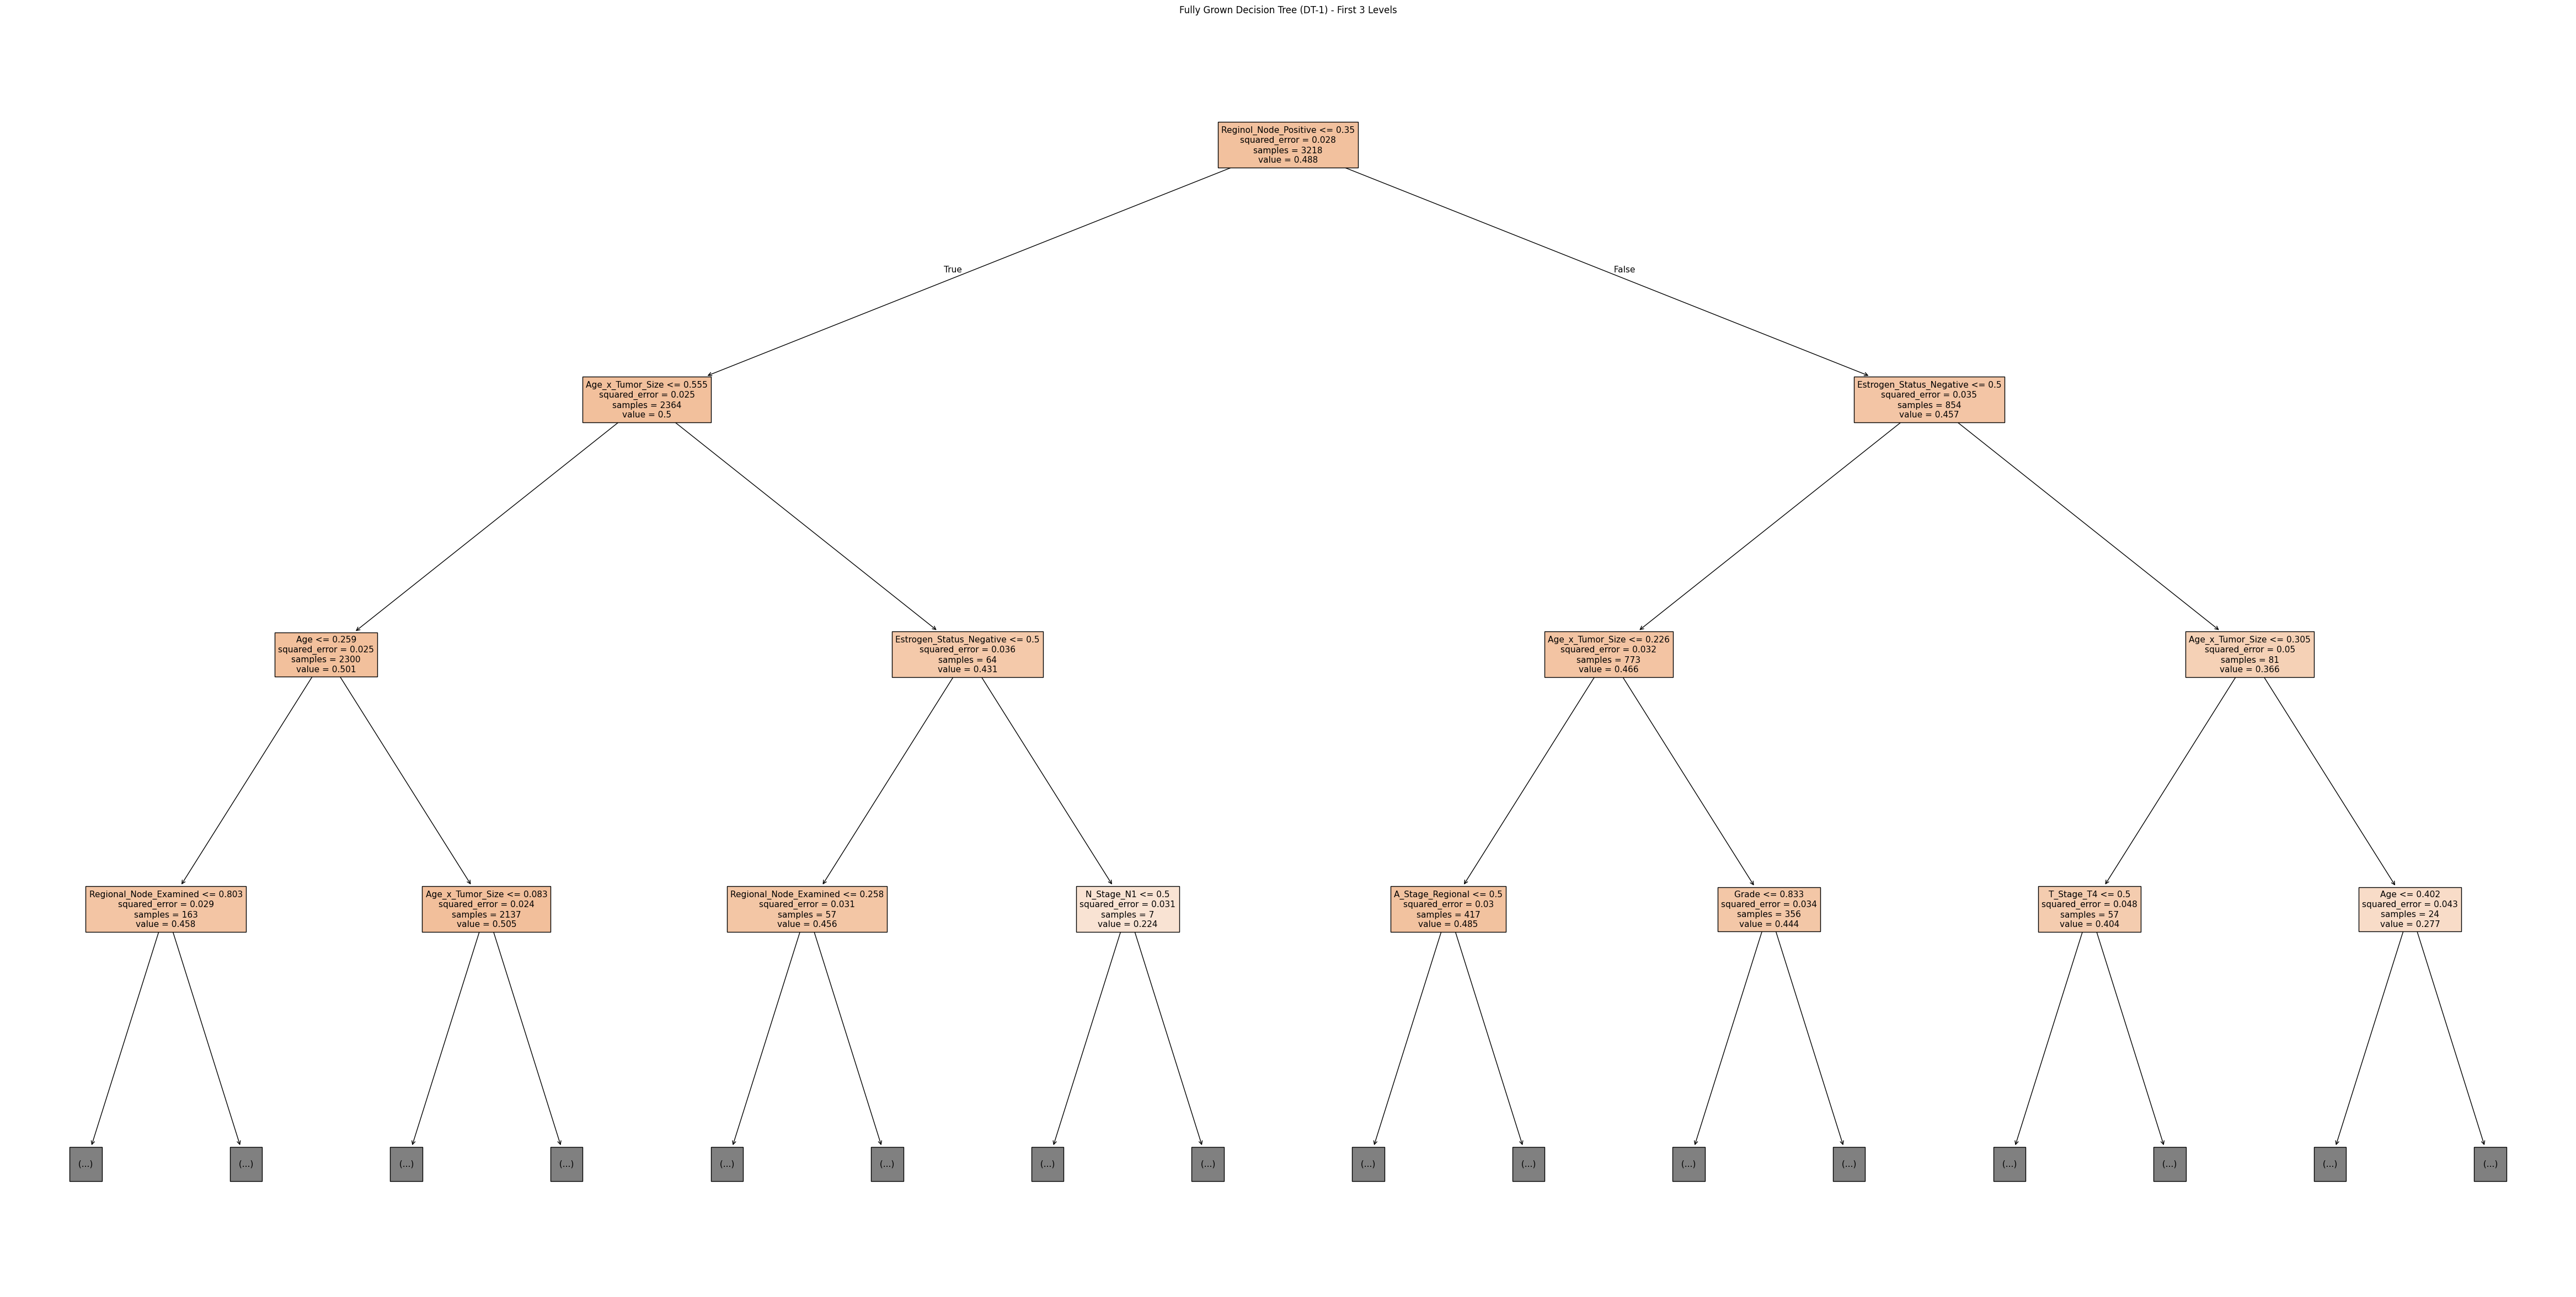

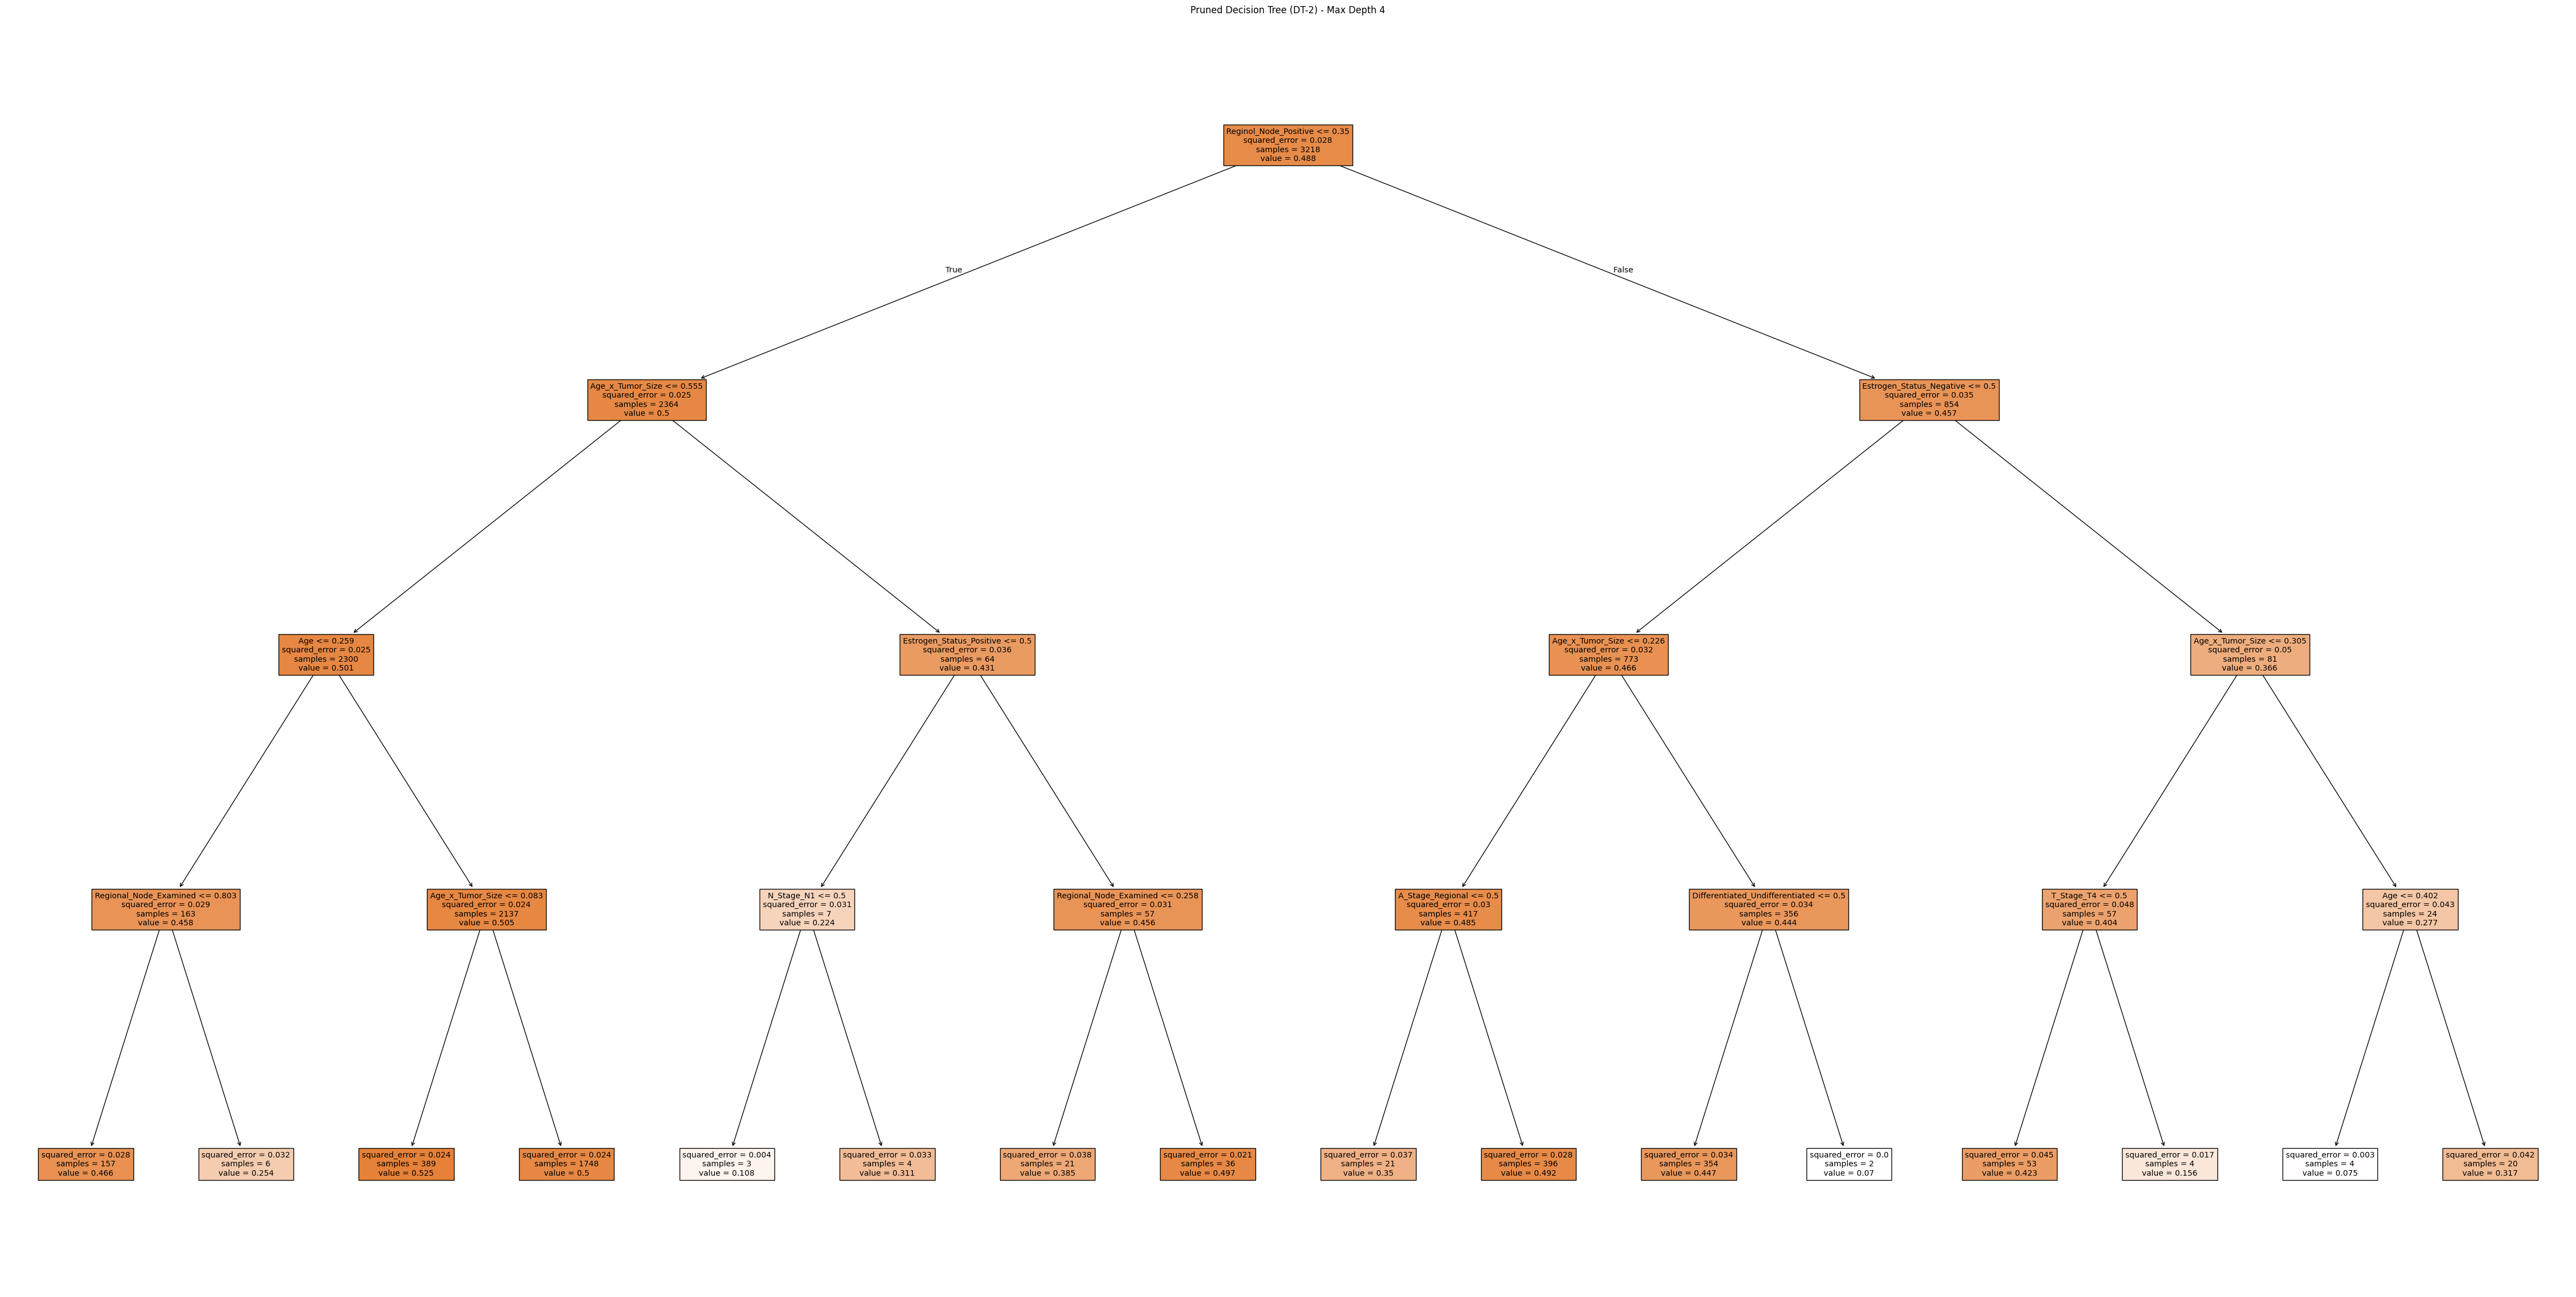

In [33]:
# Visualize the decision trees
# Use the correct DataFrame with aligned features
plt.figure(figsize=(60, 30))
plot_tree(dt_full, filled=True, feature_names=X_train.columns, max_depth=3)
plt.title("Fully Grown Decision Tree (DT-1) - First 3 Levels")
plt.show()

plt.figure(figsize=(60, 30))
plot_tree(dt_pruned, filled=True, feature_names=X_train.columns)
plt.title("Pruned Decision Tree (DT-2) - Max Depth 4")
plt.show()

Reused from Code Reuse Session 3 Building Regression DT and an Ensemble Learner (Week 11). This block evaluates the performance of both the fully grown (DT-1) and pruned (DT-2) Decision Tree models using the previously defined evaluation function. It calculates and prints the Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R²) for each model.

In [26]:
# Evaluate two models
mse_full, mae_full, r2_full = evaluate_regression_model(dt_full, X_train, X_test, y_train, y_test, "Fully Grown Decision Tree (DT-1)")
mse_pruned, mae_pruned, r2_pruned = evaluate_regression_model(dt_pruned, X_train, X_test, y_train, y_test, "Pruned Decision Tree (DT-2)")

--- Fully Grown Decision Tree (DT-1) Results ---
Mean Squared Error: 0.06
Mean Absolute Error: 0.19
R-squared: -1.02
--- Pruned Decision Tree (DT-2) Results ---
Mean Squared Error: 0.03
Mean Absolute Error: 0.14
R-squared: 0.03


Reused from Code Reuse Session 3 Building Regression DT and an Ensemble Learner (Week 11). This block compares the performance of the fully grown (DT-1) and pruned (DT-2) Decision Tree models by visualizing their Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R²) values in a set of bar charts. This helps in understanding which model performs better on the regression task.

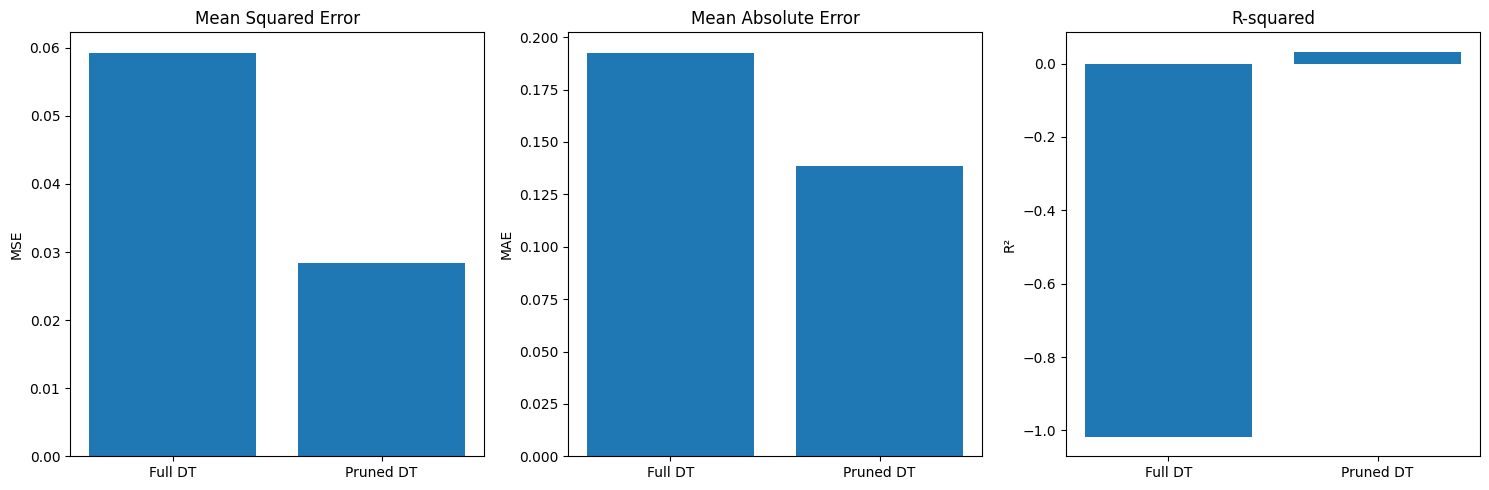

In [27]:
# Compare model performance
models = ["Full DT", "Pruned DT"]
mse_values = [mse_full, mse_pruned]
mae_values = [mae_full, mae_pruned]
r2_values = [r2_full, r2_pruned]

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(models, mse_values)
plt.title("Mean Squared Error")
plt.ylabel("MSE")

plt.subplot(1, 3, 2)
plt.bar(models, mae_values)
plt.title("Mean Absolute Error")
plt.ylabel("MAE")

plt.subplot(1, 3, 3)
plt.bar(models, r2_values)
plt.title("R-squared")
plt.ylabel("R²")

plt.tight_layout()
plt.show()

In [31]:
# Create patient_data DataFrame with basic features
patient_data = pd.DataFrame({
    'Patient_ID': ['B003212'],
    'Age': [45],
    'Sex': ['Female'],
    'T_Stage': ['T2'],
    'N_Stage': ['N0'],
    '6th_Stage': ['IIB'],
    'Differentiated': ['Moderately differentiated'],
    'Grade': [2],
    'A_Stage': ['Regional'],
    'Tumor_Size': [30],
    'Estrogen_Status': ['Positive'],
    'Progesterone_Status': ['Positive'],
    'Reginol_Node_Positive': [0]
})

# Now calculate and add the engineered features
patient_data['Tumor_Size_x_Grade'] = patient_data['Tumor_Size'] * patient_data['Grade']
patient_data['Age_x_Tumor_Size'] = patient_data['Age'] * patient_data['Tumor_Size']
patient_data['Tumor_Size_log'] = np.log(patient_data['Tumor_Size'] + 1)

# One-hot encode categorical features to match X_train
categorical_cols = ["Sex", "T_Stage", "N_Stage", "6th_Stage",
                    "Differentiated", "A_Stage",
                    "Estrogen_Status", "Progesterone_Status"]

patient_data = pd.get_dummies(patient_data, columns=categorical_cols)

# Reorder columns to align with X_train, filling missing with 0
patient_data = patient_data.reindex(columns=X_train.columns, fill_value=0)


# Make prediction
survival_months = dt_pruned.predict(patient_data)[0]

survival_months = survival_months * 100
# Convert to days (assuming an average of 30.44 days per month)
survival_days = survival_months * 30.44  # 30.44 is the average days per month

# Print prediction in months
print(f"Predicted Survival Months for Patient B002565: {survival_months:.2f} months")
# Print prediction in days
print(f"Predicted Survival Days for Patient B003212: {survival_days:.2f} days")

Predicted Survival Months for Patient B002565: 38.52 months
Predicted Survival Days for Patient B003212: 1172.41 days
